In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
### RECORREMOS UNA PROFUNDIDAD

dz = 0.0005e-6 ## Paso en Profundidad  nm
start_z = 0
stop_z = 5e-6

dx = 0.1e-6  ## Paso en Superficie um
start_x = -10e-6
stop_x = 10e-6

### EN UN TIEMPO 
dt = 10e-15  ## Time Step fs
start_t = 0
stop_t = 20e-12 ## Finalizamos a ps

x = np.linspace(start_x,stop_x,int(round((stop_x-start_x)/dx)))
z = np.linspace(start_z,stop_z,int(round((stop_z-start_z)/dz)))
t = np.linspace(start_t,stop_t,int(round((stop_t-start_t)/dt)))

X,Z= np.meshgrid(x,z)

## Auxiliar para Plot X-Z en punto medio de Y
x_mid = x.shape[0]//2

In [128]:
# ------------- Red Electrones -----------------
Ce_aux = 134.5 # J / (m^3 K^2)
ke = 235  # J /(m K s)
g = 5.69e17 # J /(m K^3 s)

#  ----------------------------------------------

# ------------- Red Lattice -----------------
Ci = 2.42e6  # J / (m^3 K)
#  -------------------------------------------


# ------------- Parámetros Láser -----------------
R = 0.88 # Reflectancia A.U.
delta = 20e-9 # Optical Penetration (nm)
ball_len = 100e-9 # Ballistic Length (nm)
 
tp = 100e-15 # FWHM fs
w0 = 5e-6 # Waist um
wavelength = 1.032e-6 # Wavelength (um)
#  ------------------------------------------------------

# ------------- Parámetros Varios -----------------
ys = 3e-6 ## Perfil de Apertura del Láser (um)
T0 = 300 # K Temperatura Ambiente (K)
x0 = 0 # Posición central del Spot en x
y0 = 0 # Posición central del Spot en y
zs = 0 # Z superficial
n = 1 ## Refractive Index
Zr = n*np.pi*w0**2/wavelength
w = w0*(1+Z**2/Zr**2)**1/2

In [129]:
F = 2.0e4 # J/cm**2

In [138]:
radius_crater = (1.76e-6)/2
depth_crater = 0.4e-6

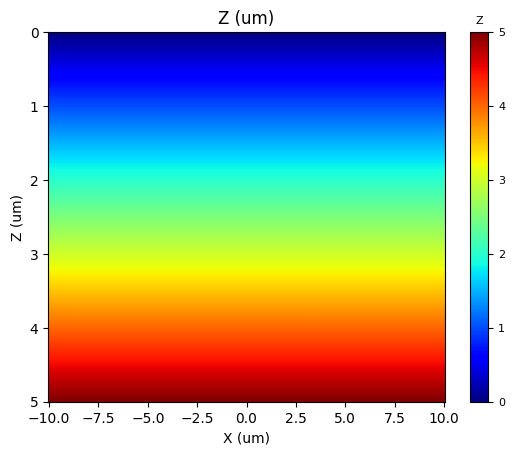

In [131]:
plt.pcolor(x*1e6,z*1e6,Z*1e6,cmap='jet')
plt.xlabel("X (um)")
plt.ylabel("Z (um)")
plt.title("Z (um)")
clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('Z',fontsize=8)
plt.gca().invert_yaxis()

In [139]:
ZS = depth_crater * np.sqrt(1-X**2/radius_crater**2)
ZS = np.nan_to_num(ZS,copy = False)

C:\Users\lomenaca\AppData\Local\Temp\ipykernel_21072\1893438325.py:1: RuntimeWarning: invalid value encountered in sqrt
  ZS = depth_crater * np.sqrt(1-X**2/radius_crater**2)


In [140]:
plt.pcolor(x*1e6,z*1e6,ZS*1e6,vmin = 0, vmax = depth_crater*1e6,cmap='jet')
plt.xlabel("X (um)")
plt.ylabel("Z (um)")
plt.title("ZS (um)")
clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('Zs',fontsize=8)
plt.gca().invert_yaxis()

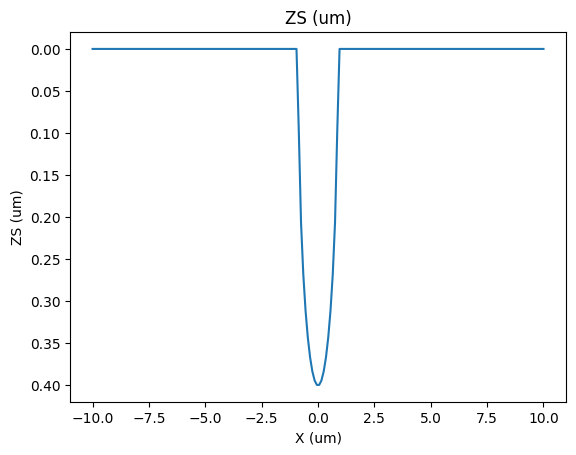

In [146]:
plt.plot(x*1e6,ZS[0,:]*1e6)
plt.xlabel("X (um)")
plt.ylabel("ZS (um)")
plt.title("ZS (um)")
plt.gca().invert_yaxis()

In [124]:
from pylab import *
cmap = cm.get_cmap('jet', 11)    # 11 discrete colors

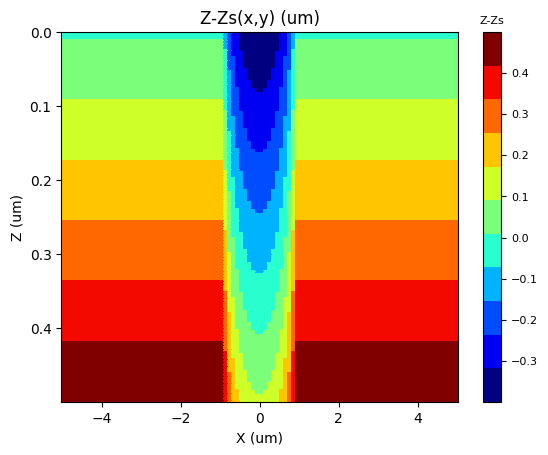

In [145]:
plt.pcolor(x[50:150]*1e6,z[:1000]*1e6,(Z-ZS)[:1000,50:150]*1e6,vmin = (Z-ZS).min()*1e6,cmap=cmap)
clb=plt.colorbar(cmap=cmap)
plt.xlabel("X (um)")
plt.ylabel("Z (um)")
plt.title("Z-Zs(x,y) (um)")
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('Z-Zs',fontsize=8)
plt.gca().invert_yaxis()

In [115]:
Znew = Z.copy()

Znew[:120,:] = Z[:120,:] - ZS[:120,:]

In [118]:
plt.pcolor(x[50:150]*1e6,z[:250]*1e6,Znew[:250,50:150]*1e6,cmap="Greys")
plt.gca().invert_yaxis()
plt.xlabel("X (um)")
plt.ylabel("Z (um)")
plt.title("Z-Zs(x,y)");

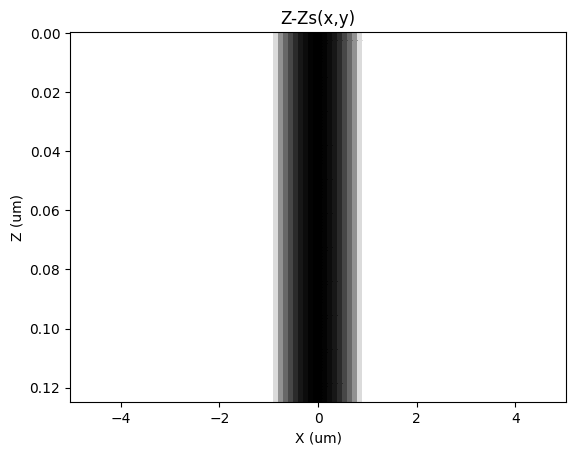

In [119]:
plt.pcolor(x[50:150]*1e6,z[:250]*1e6,ZS[:250,50:150]*1e6,cmap="Greys")
plt.gca().invert_yaxis()
plt.xlabel("X (um)")
plt.ylabel("Z (um)")
plt.title("Z-Zs(x,y)");

In [10]:
plt.scatter(x,S[0,:],s=2,c="orange",label = "New Pulse")
plt.plot(x,S_fix[0,:],alpha=0.2,label = "Old Pulse")
plt.axvline(radius_crater,ls="dotted",label = "Radio Crater",c="green")
plt.legend()

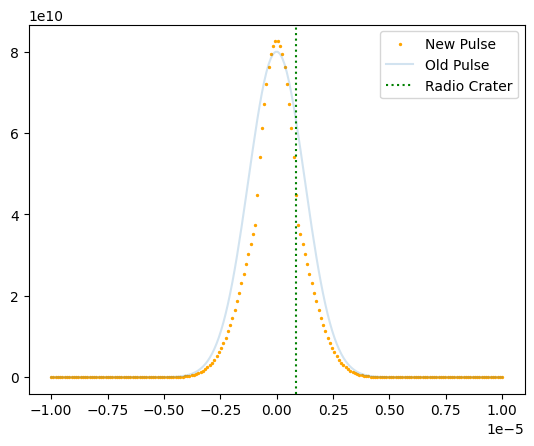

In [61]:
plt.scatter(x,S[7,:],s=2,c="orange",label = "New Pulse")
plt.plot(x,S_fix[0,:],alpha=0.2,label = "Old Pulse")
plt.axvline(radius_crater,ls="dotted",label = "Radio Crater",c="green")
plt.legend()